## Lineer Regresyon Nedir?

Lineer Regresyon, supervised learning (denetimli öğrenme) modellerinde, bağımsız değişkenler (girdi, X) ile bağımlı değişken (çıktı, y) arasındanki en uyumlu hattı çizen bir regresyon modeli algoritmasıdır. Bir veya daha fazla girdi ile çıktı arasındaki istatistiksel ilişkiyi tanımlamak için bir denklem oluşturur. Ve bu oluşturulan denkleme göre de bir lineer doğru çizer.

Single Lineer Regresyon (Tekli Lineer Regresyon) ve Multiple Lineer Regresyon (Çoklu Lineer Regresyon) olmak üzere iki alt başlık altında incelenebilir.

## Single Lineer Regresyon (Tekli Lineer Regresyon) :
Tek bir x girdisi ile, y çıktısını modellemeye çalışan algoritmadır.

![alt text](https://github.com/azsaritas/makine_ogrenmesi/blob/main/dosyalar/lineer_regresyon/reg.png?raw=true)

y : çıktı

b0 : intercept değeri (sabit katsayı değeri)

b1 : girdi katsayısı

x : girdi

## Multiple Lineer Regresyon (Çoklu Lineer Regresyon) : 
Birden fazla girdi ile, y çıktısını modellemeye çalışan algoritmadır.

![alt text](https://github.com/azsaritas/makine_ogrenmesi/blob/main/dosyalar/lineer_regresyon/multireg.png?raw=true).

y : çıktı

b0 : intercept değeri (sabit katsayı değeri)

b1 : 1 no.lu girdi katsayısı

x1 : 1 no.lu girdi

b2 : 2 no.lu girdi katsayısı

x2 : 2 no.lu girdi

bn : n no.lu girdi katsayısı

xn : n no.lu girdi


Bir Lineer Regresyon modelinin amacı, gerçek çıktı ile tahmin edilen çıktı değeri arasındaki hatayı minimum yapacak, en uygun lineer doğruyu çizmektir.

![alt text](https://github.com/azsaritas/makine_ogrenmesi/blob/main/dosyalar/lineer_regresyon/regresyon.png?raw=true).

Grafiği yorumlamak gerekirse; noktalar, her bir x girdisine ait y çıktısına ait data pointleri (data noktaları) simgelemektedir. Çizilen doğru ise, tüm data pointler incelendiğinde, bu noktaları en iyi temsil edecek doğruyu simgelemektedir. Artık bizim Lineer Regresyon modelimiz, bir tahminde bulunucak ise, sorulan x değeri için, doğru üzerine denk gelen y noktasını tahmin edecektir. Yani X =100 girdisi için modelin tahmini yaklaşık 75 gibi bir değer olacaktır. Veya X =150 girdisi için modelin tahmini yaklaşık 100 gibi bir değer olacaktır. Veya X =250 girdisi için modelin tahmini, grafikten okunduğu üzere yaklaşık 150 gibi bir değer olacaktır.



## Tek değişkenli lineer regresyon örnek uygulama
Kullanacağımız veri seti, 205 satır ve 26 kolondan oluşan ve araç özelliği ile fiyat ilişkisini içeren araba verilerinin bulunduğu bir veri setidir.

Araç fiyat alımlarında aracın motor boyutu arttıkça araç fiyatının da orantılı bir şekilde arttığı görülmektedir.

Problem tanımımız araç motor boyutundan araç fiyat eğrisini çıkaracak denklemi bulmaktır. Kullanacak olduğumuz kütüphaneleri import edip veriyi okutarak başlayalım.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv("https://raw.githubusercontent.com/azsaritas/makine_ogrenmesi/main/dosyalar/lineer_regresyon/CarPrice_Assignment.csv")
#veri setinin bulunduğu csv dosyasını github sayfamdan okutuyorum

Lineer regresyonun verilen x değerlerini en iyi temsil edecek değerleri bularak y değerine ulaşabileceğimiz denkleme odaklanarak çalıştığını öğrenmiştik. Bu problemde de x, bağımsız değişkenimizi araç motor gücü olarak belirlerken, y bağımlı değişkenimizi yani tahmin edecek olduğumuz değişkeni de araç fiyatı olarak belirleyip lineer regresyon modelimizi kuruyoruz.

In [2]:
X = df[["enginesize"]]
y = df[["price"]]
reg_model = LinearRegression().fit(X, y)

Lineer regresyon denkleminin oluşturulmasının ardından denklemi ifade edecek sabit ve x katsayısı hazırlanmış olur.

In [3]:
# sabit (b - bias)
reg_model.intercept_[0]
# -8005.445531145215
# motor gücünün'nin katsayısı (x1)
reg_model.coef_[0][0]
# 167.69841639317224

167.6984163931722

x’in katsayısının 0’dan büyük olması eğilimin pozitif yönde olduğunu yani bir değişkenin artışının diğer değişkeni de arttırdığını ifade etmektedir. Çalışmanın başında yapılan korelasyon analizinde de bu bulgumuzla paralel şekilde örneğimizde yönün pozitif olduğunu gözlemlemiştik.

Şimdi bir de model denklemini çizip modelin gerçek y değerlerini nasıl temsil ettiğine bakalım.

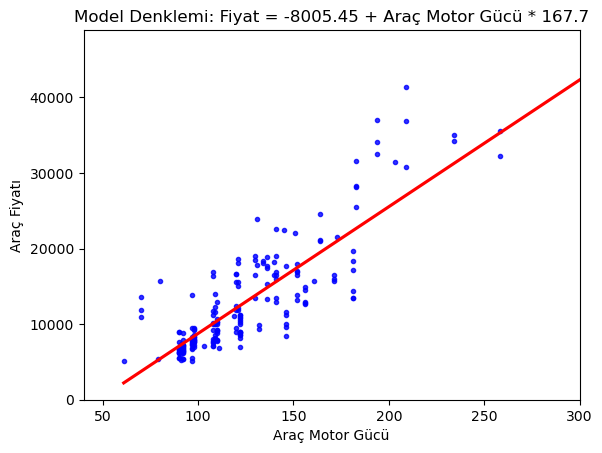

In [4]:
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")
g.set_title(f"Model Denklemi: Fiyat = {round(reg_model.intercept_[0], 2)} + Araç Motor Gücü * {round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Araç Fiyatı")
g.set_xlabel("Araç Motor Gücü")
plt.xlim(40, 300)
plt.ylim(bottom=0)
plt.show()

Elde edilen denklemde de görüldüğü gibi motor gücünün artışı araç fiyatının da artmasına neden olmaktadır. MAE ile model başarısı incelenirse;

In [5]:
# MAE -Mean absolute error ile hata hesabı
y_pred = reg_model.predict(X)
mean_absolute_error(y, y_pred)
# 2815.0223538364103

2815.0223538364103

Elde edilen MAE neticesinde, doğrusal regresyon analizi ile kurulan model ile yapılan tahminlerde ortalama 2815 birimlik bir sapma mevcuttur. 

150 motor gücüne sahip bir araç için fiyat tahmini yapılmak istenirse:


In [6]:
reg_model.intercept_[0] + reg_model.coef_[0][0]*150



17149.31692783062

17149 birimlik bir fiyat tahmini elde edilecektir. 
